<center>
    <a href = "https://github.com/brndnaxr"><img src="https://64.media.tumblr.com/de70f81b2d149064c8714864244d6e20/649c99e42a5c377a-49/s400x600/8bcb986589d9e2974995f94329239137f956e333.png" width="100" alt="Error 404"/></a>
</center>

# **Cost Optimization** at Rossmann Store

### **Predicting Revenue** from Sales

**Benefits**

Forecasted revenue is calculated by taking the [**average selling price (ASP)**](https://www.investopedia.com/terms/a/averagesellingprice.asp) for future periods and multiplying that by the number of expected units sold. This strategy will maximize company's profit. From these models, analysts can then compare earnings growth to revenue growth to see how well **the company is able to manage costs and bring [revenue growth](https://www.investopedia.com/articles/active-trading/022315/stock-analysis-forecasting-revenue-and-growth.asp) to the bottom line**.

![](https://cdn.dribbble.com/users/124813/screenshots/5336064/594-man-telescope-floydworx.png)

<center><strong>Source:</strong> Photo by <a href="https://dribbble.com/shots/5336064/attachments/5336064-Man-with-telescope?mode=media">Csaba Gyulai</a> on <a href="https://dribbble.com/">Dribbble</a></center> 

<hr>

# Table of Contents


* [Business Understanding](#ch1)
* [Analytic Approach](#ch2)
* [Data Understanding](#ch3)
* [Data Preparation](#ch4)
* [Feature Engineering](#ch5)
* [Time Series Modeling](#ch6)
* [Feature Selection](#ch7)
* [Evaluation](#ch8)
* [Deployment](#ch9)
* [Business Feedback](#ch10)


<hr>

# Business Understanding <a id="ch1"></a>

**Why Business Forecasting Is So Important?**

Appropriately used, [forecasting allows businesses](https://www.investopedia.com/articles/financial-theory/11/basics-business-forcasting.asp) to plan ahead for their needs, raising their chances of staying competitive in the markets
* Forecasting is valuable to businesses so that they can make informed business decisions.
* Financial forecasts are fundamentally informed guesses, and there are risks involved in relying on past data and methods that cannot include certain variables.
* Forecasting approaches include qualitative models and quantitative models.

**About the company**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, [Rossmann Store](https://www.kaggle.com/c/rossmann-store-sales/overview/description) managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

**KEY TAKEAWAYS:**

* Forecasting is valuable to businesses so that they can make informed business decisions.
* [Financial forecasts](https://www.investopedia.com/articles/financial-theory/11/basics-business-forcasting.asp) are fundamentally informed guesses, and there are risks involved in relying on past data and methods that cannot include certain variables.
* Forecasting approaches include qualitative models and quantitative models.

# Analytic Approach <a id="ch2"></a>

> This notebook takes a **Time Series Approach**. In which **3 models** were applied. Likewise, this project also has a **scope focused** on **time series modeling.** As you expect, at the end, we will address the financial motivations involved in the project, as well as its translation into a financial result.

# Data Understanding <a id="ch3"></a>

## Data Collection <a id="ch3.1"></a>

We have downloaded the data through the link below. **Accessed Aug. 2021.**

> **Source:** https://www.kaggle.com/c/rossmann-store-sales/data

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Uncomment above for upload files through widget.

## Dataset Preview <a id="ch3.2"></a>

In [2]:
### import 'read in data' library
import pandas as pd

### reading files
path = r'D:/jupyter/datasets/rossmann-store-sales/'

train_raw = pd.read_csv('train.csv', low_memory=False)
test_raw = pd.read_csv('test.csv', low_memory=False)
store_raw = pd.read_csv('store.csv', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

**Preview** the **first dataset**, i.e. ``train.csv``

In [ ]:
### "train.csv" - preview the first dataset

display(train_raw.head())

If we manually write what outputs we expect in the data types, it will save us a lot of time down the road.

DTEXPCT01: Data type we **expect** for each column:

| Column               | dtype       |  
| -------------------- | ---------   |
|**Store**             |  int64      | 
|**DayOfWeek**         |  int64      | 
|**Date**              |  datetime   |
|**Sales**             |  int64      |
|**Customers**         |  int64      | 
|**Open**              |  int64      |
|**Promo**             |  int64      |
|**StateHoliday**      |  object     |
|**SchoolHoliday**     |  int64      |

**Preview** the **second dataset**, i.e. ``test.csv``

In [ ]:
### 'test.csv'
test_raw.head(10)

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0
5   6     10          4  2015-09-17   1.0      1            0              0
6   7     11          4  2015-09-17   1.0      1            0              0
7   8     12          4  2015-09-17   1.0      1            0              0
8   9     13          4  2015-09-17   1.0      1            0              0
9  10     14          4  2015-09-17   1.0      1            0              0

**Preview** the **third dataset**, i.e. ``store.csv``

In [ ]:
### "store.csv"
store_raw.head(10)

Store StoreType  ... Promo2SinceYear    PromoInterval
0      1         c  ...             NaN              NaN
1      2         a  ...          2010.0  Jan,Apr,Jul,Oct
2      3         a  ...          2011.0  Jan,Apr,Jul,Oct
3      4         c  ...             NaN              NaN
4      5         a  ...             NaN              NaN
5      6         a  ...             NaN              NaN
6      7         a  ...             NaN              NaN
7      8         a  ...             NaN              NaN
8      9         a  ...             NaN              NaN
9     10         a  ...             NaN              NaN

[10 rows x 10 columns]

DTEXPCT02: Data type we **expect** for each column:

| Column               | dtype       |  
| -------------------- | ---------   |
|**Store**             |  int64      | 
|**StoreType**         |  object     | 
|**Assortment**              |  object     |
|**CompetitionDistance**         |  float64      |
|**CompetitionOpenSinceMonth**     |  int64      | 
|**CompetitionOpenSinceYear**     |  int64      |
|**Promo2**             |  int64      |
|**Promo2SinceWeek**      |  int64      |
|**Promo2SinceYear**     |  int64      |
|**PromoInterval**     |  object      |

**Basic information about the data**

In [ ]:
### data shape
shape_v1 = train_raw.shape
print('The dataframe "train.csv" has:')
print(f'{shape_v1[0]} rows')
print(f'{shape_v1[1]} columns')

The dataframe "train.csv" has:
1017209 rows
9 columns


In [ ]:
### data shape
shape_v2 = store_raw.shape
print('The dataframe "store.csv" has:')
print(f'{shape_v2[0]} rows')
print(f'{shape_v2[1]} columns')

The dataframe "store.csv" has:
1115 rows
10 columns


## Data Description <a id="ch3.3"></a>

| Column Variable | What it means  |  
| -------------------- | -------------------- |
|**Id**            | an Id that represents a (Store, Date) duple within the test set       |
|**Store**            | a unique Id for each store              | 
|**DayOfWeek**            | days of the week, e.g. monday = 1, sunday = 7              | 
|**Sales**            |the turnover for any given day **(this is what we are predicting)**          |
|**Customers**            |   the number of customers on a given day                 | 
|**Open**         |an indicator for whether the store was open: 0 = closed, 1 = open |
|**StateHoliday**         | indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None         |
|**SchoolHoliday**         |  indicates if the (Store, Date) was affected by the closure of public schools       |
|**StoreType**         |  differentiates between 4 different store models: a, b, c, d    |
|**Assortment**            |  describes an assortment level: a = basic, b = extra, c = extended        |
|**CompetitionDistance**         |    distance in meters to the nearest competitor store      |
|**CompetitionOpenSince[Month/Year]** |   gives the approximate year and month of the time the nearest competitor was opened    |
|**Promo**            |  indicates whether a store is running a promo on that day         |
|**Promo2**            |   Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating  |
|**Promo2Since[Year/Week]**   | describes the year and calendar week when the store started participating in Promo2     |
|**PromoInterval**    | describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store    |

# Data Preparation <a id="ch4"></a>

* **1. Quais são os tipos de variáveis?**
* **2. Qual o formato/tamanho do nosso dataset?**
* **3. Tratar valores nulos e vazios** (pode ser parte do fenômeno)
* **4. Remover outliers** (pode ser parte do fenômeno)
* **5. Remover dados duplicados** (pode ser parte do fenômeno)
* **6. Unificar valores como (FEM, Feminino, F, ...)**
* **7. Tratar valores fora de domínio** (idade negativa, etc)
* **8. Tratar valores fora de sentido** (*Aparência do dia*: sol, nublado, chuva, **menos** $\leftarrow$ erro)

## Data Wrangling

## Cleaning Steps<a id="ch4.1"></a>

* **Step 0.** Setting another dataset just for manipulation
* **Step 1.** Checking data types
* **Step 2.** Cheking missing values
* **Step 3.** Filling in missing values
* **Step 4.** Adjusting data types
* **Step 5.** Merging dataframes
* **Step 6.** Adding 'datetime' columns
* **Step 7.** Removing values
* **Step 8.** Dropping columns

### Imports

In [ ]:
import warnings
import datetime

import pandas as pd
import numpy  as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express        as px
import plotly.graph_objects  as go
import plotly.offline as pyoff

from datetime import datetime

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from IPython.display import display, HTML, display_html

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Helper Functions

In [ ]:
### jupyter settings configuration

def jupyter_settings():
    %matplotlib inline
    sns.set()
    pyoff.init_notebook_mode()

    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None

    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)

**Activating environment**

In [ ]:
jupyter_settings()

### **Step 0.** Setting another dataset just for manipulation

In [ ]:
### setting another dataset for integrity and cleansing
train = train_raw.copy()
store = store_raw.copy()

### **Step 1.** Checking data ``types``

In [ ]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Recalling data types we expect for each column.

| Column               | dtype       |  
| -------------------- | ---------   |
|**Store**             |  int64      | 
|**DayOfWeek**         |  int64      | 
|**Date**              |  datetime   |
|**Sales**             |  int64      |
|**Customers**         |  int64      | 
|**Open**              |  int64      |
|**Promo**             |  int64      |
|**StateHoliday**      |  object     |
|**SchoolHoliday**     |  int64      |

TSK001: it is necessary to convert ``Date`` variable type

In [ ]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

Recalling data types we expect for each column.

| Column               | dtype       |  
| -------------------- | ---------   |
|**Store**             |  int64      | 
|**StoreType**         |  object     | 
|**Assortment**              |  object     |
|**CompetitionDistance**         |  float64      |
|**CompetitionOpenSinceMonth**     |  int64      | 
|**CompetitionOpenSinceYear**     |  int64      |
|**Promo2**             |  int64      |
|**Promo2SinceWeek**      |  int64      |
|**Promo2SinceYear**     |  int64      |
|**PromoInterval**     |  object      |

TSK002: it is necessary to convert ``Competition`` and ``Promo`` variable type. More specifically:
* ``CompetitionOpenSinceMonth``
* ``CompetitionOpenSinceYear``
* ``Promo2SinceWeek``
* ``Promo2SinceYear``

### **Step 2.** Cheking ``missing`` values

In [ ]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Exploring the reasons why there are missing values**

Only closed stores and only opened stores

In [ ]:
closed_sales_train_df = train[train['Open'] == 0]
open_sales_train_df = train[train['Open'] == 1]

### how many stores were closed and opened
print(f'The data has {len(closed_sales_train_df)} closed stores from 2013 to 2015.')
print(f'The data has {len(open_sales_train_df)} opened stores from 2013 to 2015.')

The data has 172817 closed stores from 2013 to 2015.
The data has 844392 opened stores from 2013 to 2015.


There're 172817 closed stores in the data. It is about 10% of the total amount of observations. To avoid any biased forecasts **we will drop these values.**

What about opened stores with zero sales?

**Opened stores with zero sales**

In [ ]:
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 9)


Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
86825     971          5  2015-05-15      0          0     1      0   
142278    674          4  2015-03-26      0          0     1      0   
196938    699          4  2015-02-05      0          0     1      1   
322053    708          3  2014-10-01      0          0     1      1   
330176    357          1  2014-09-22      0          0     1      0   

       StateHoliday  SchoolHoliday  
86825             0              1  
142278            0              0  
196938            0              0  
322053            0              0  
330176            0              0

Interestingly enough, there are opened store with **no sales on working days.** There're only 54 days in the data, so we can assume that there were external factors involved, e.g. manifestations.

In [ ]:
# missing values in CompetitionDistance
store[pd.isnull(store.CompetitionDistance)]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  nan   
621    622         a          c                  nan   
878    879         d          a                  nan   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        nan                       nan       0   
621                        nan                       nan       0   
878                        nan                       nan       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              nan              nan              NaN  
621              nan              nan              NaN  
878            5.000         2013.000  Feb,May,Aug,Nov

Apperently this information is simply missing from the data. No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values (which is twice less that the average).

### **Step 3.** Filling in ``missing`` values

Either there is no competition close or the competitor is too far away. Therefore, we will fill null values in ``CompetitionDistance`` with the **median**.

**Filling in stage now**

In [ ]:
# fill NaN with a median value (skewed distribuion)
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

Continuing further with missing data. What about ``Promo2SinceWeek``? May it be that we observe unsusual data points?

In [ ]:
# no promo = no information about the promo?
_ = store[pd.isnull(store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

(0, 10)

No, if there's no ``Promo2`` then there's no information about it. We can **replace these values by zeros**. The same goes for tha variables deducted from the competition, ``CompetitionOpenSinceMonth`` and ``CompetitionOpenSinceYear``.

In [ ]:
# replace NA's by 0
store.fillna(0, inplace = True)

Before we keep moving, we need to check if these adjustments worked well.

**Checking results**

In [ ]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### **Step 4.** Adjusting data ``types``

TSK001: converting ``Date`` column type

In [ ]:
### basic adjustment on data type 'object' to 'datetime'
train['Date'] = pd.to_datetime(train['Date'])
train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

TSK002: converting ``Competition`` and ``Promo`` columns type

In [ ]:
### for 'Competition' columns
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(np.int64)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(np.int64)

#### for 'Promo' columns
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype(np.int64)
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype(np.int64)

store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth      int64
CompetitionOpenSinceYear       int64
Promo2                         int64
Promo2SinceWeek                int64
Promo2SinceYear                int64
PromoInterval                 object
dtype: object

### **Step 5.** Merging dataframes

**Merged dataframe:** ``train_store``

By specifying inner join we make sure that only those observations that are present in both train and store sets are merged together.

In [ ]:
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

We are dealing with time series data so it will probably serve us to extract dates for further analysis. We also have two likely correlated vaiables in the dataset, which can be combined into a new feature.

### **Step 6.** Adding 'datetime' columns

**Create ``Year``, ``Month`` and ``Day`` columns to ``train`` set**

In [ ]:
# upgrading model's predictive power with new variables
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.weekofyear

train.head(2) # viewing new columns

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  
0              1  2015      7   31          31  
1              1  2015      7   31          31

Note the new columns in the upper right corner.

**Create ``Year``, ``Month`` and ``Day`` columns to ``train_store`` set**

In [ ]:
train_store['Year'] = pd.DatetimeIndex(train_store['Date']).year
train_store['Month'] = pd.DatetimeIndex(train_store['Date']).month
train_store['Day'] = pd.DatetimeIndex(train_store['Date']).day
train_store['WeekOfYear'] = pd.DatetimeIndex(train_store['Date']).weekofyear

train_store.head(2)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      1          4 2015-07-30   5020        546     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a             1270.000   
1              1         c          a             1270.000   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                      2008       0   
1                          9                      2008       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  \
0                0                0             0  2015      7   31   
1                0                0             0  2015      7   30   

   WeekOfYear  
0          31  
1          31

Note the new columns in the upper right corner.

### **Step 7.** Removing values

Now, it makes no sense to work with data from the days when stores were closed. Therefore, as part of the process, it will be good practice to eliminate these data points from our dataset.

**Removing *zero sales* and *closed days*  in ``train_store``**

In [ ]:
train_store = train_store[(train_store['Open'] == 1) & (train_store['Sales'] != 0)]
print(f'Now, the train_store set has: {train_store.shape[0]} rows')
train_store.head(2)

Now, the train_store set has: 844338 rows


Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      1          4 2015-07-30   5020        546     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a             1270.000   
1              1         c          a             1270.000   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                      2008       0   
1                          9                      2008       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  \
0                0                0             0  2015      7   31   
1                0                0             0  2015      7   30   

   WeekOfYear  
0          31  
1          31

### **Step 8.** Dropping columns

Now, the ``train_store`` set has only open days rows. For this reason, it makes sense to **remove the ``Open`` column** once it no longer makes difference - since all values are now equal to ``1``.

In [ ]:
### remove 'open' column, it's 1 for every row
train_store.drop(['Open'], axis = 1, inplace = True);
train_store.head(2) # see if that worked

Store  DayOfWeek       Date  Sales  Customers  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555      1            0   
1      1          4 2015-07-30   5020        546      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a             1270.000   
1              1         c          a             1270.000   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                      2008       0   
1                          9                      2008       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  \
0                0                0             0  2015      7   31   
1                0                0             0  2015      7   30   

   WeekOfYear  
0          31  
1          31

## Data Analysis

``Sales`` and ``Customers`` trend visualization  through the time: **by Average.**

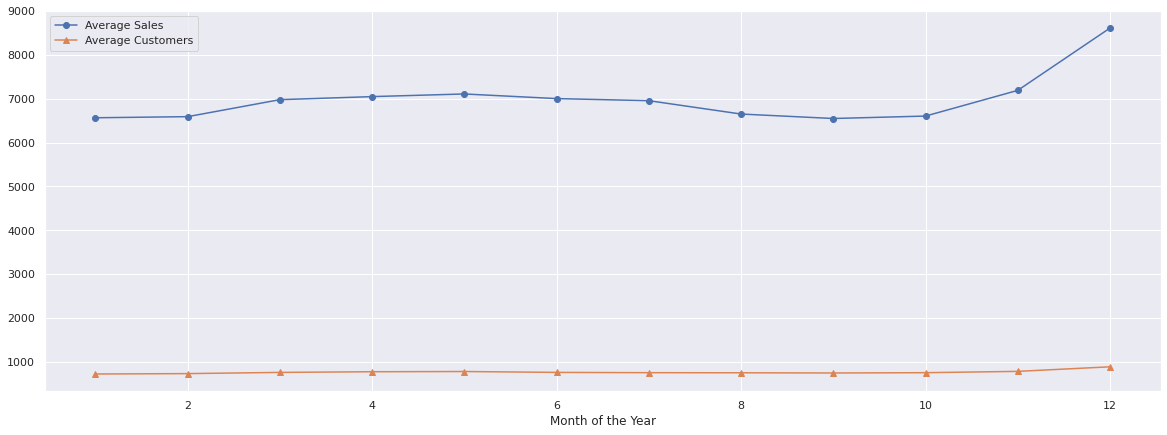

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(train_store.groupby('Month')[['Sales']].mean(), 'o-', label="Average Sales")
plt.plot(train_store.groupby('Month')[['Customers']].mean(), '^-', label="Average Customers")
plt.xlabel("Month of the Year")
plt.legend();

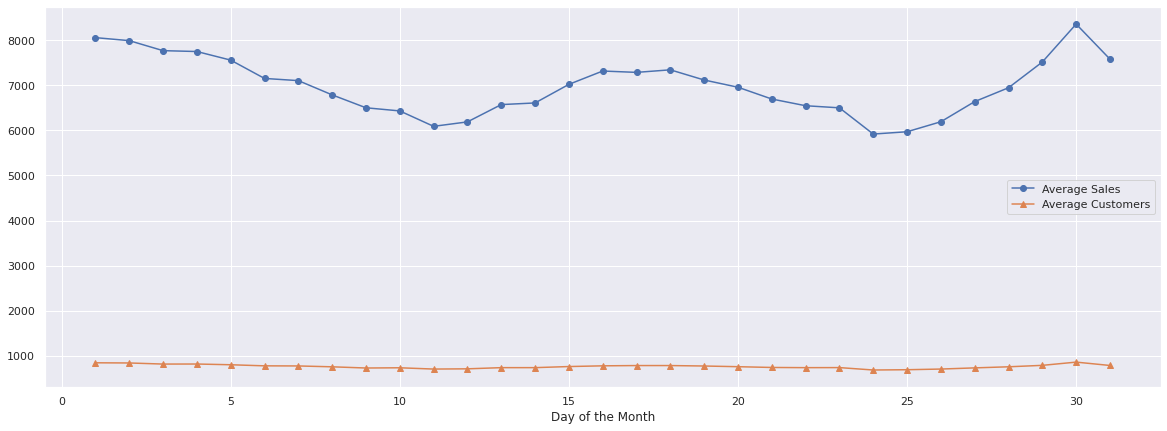

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(train_store.groupby('Day')[['Sales']].mean(), 'o-', label="Average Sales")
plt.plot(train_store.groupby('Day')[['Customers']].mean(), '^-', label="Average Customers")
plt.xlabel("Day of the Month")
plt.legend();

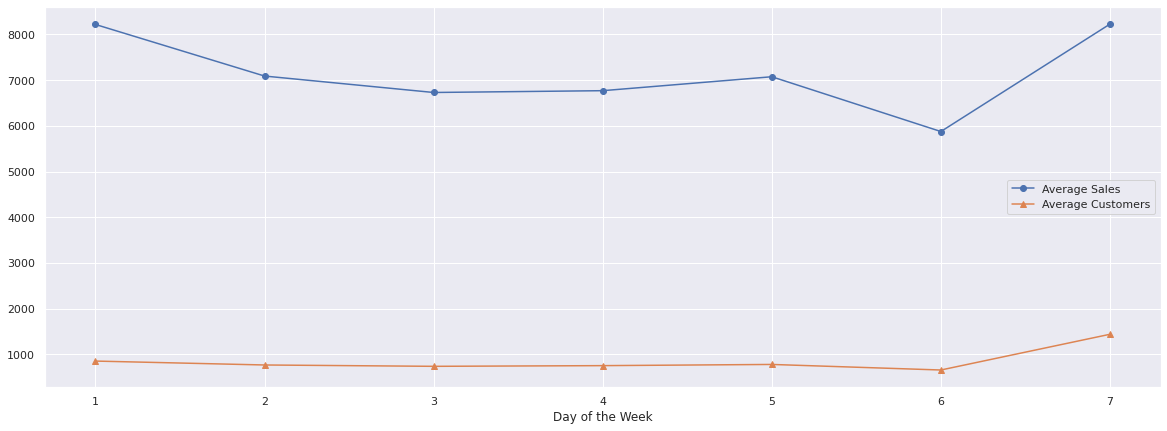

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(train_store.groupby('DayOfWeek')[['Sales']].mean(), 'o-', label="Average Sales")
plt.plot(train_store.groupby('DayOfWeek')[['Customers']].mean(), '^-', label="Average Customers")
plt.xlabel("Day of the Week")
plt.legend();

**Store types investigation**

In this section we will closely look at different levels of ``StoreType`` and how the main metric ``Sales`` is distributed among them.

In [ ]:
# ### data: 'train_store' set
# ### graph: boxplot

# # Initialize the figure with a linear x axis
# f, ax = plt.subplots(figsize=(20, 6))
# ax.set_xscale("linear")

# # Plot the boxplot here
# sns.boxplot(x="Sales", y="StoreType", data=train_store,
#             whis=[0, 100], width=.6, palette="vlag")

# # Add in points to show each observation
# sns.stripplot(x="Sales", y="StoreType", data=train_store,
#               size=4, color=".3", linewidth=0)

# # Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# sns.despine(trim=True, left=True)

**Brief Descriptive Statistics**

In [ ]:
train_store.groupby('StoreType')['Sales'].describe().style.background_gradient(cmap='Blues')

``StoreType`` B has the **highest average of ``Sales``** among all others, however we have much less data for it. So let's print an overall sum of ``Sales`` and ``Customers`` to answer the following question:
* Which ``StoreType`` is the most selling and crowded one?

In [ ]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum().style.background_gradient(cmap='Blues')

**Clearly stores of type A.** StoreType D goes on the second place in both Sales and Customers.

**Categorical Variable Analysis**


In [ ]:
# ### graph: Sales x Month

# # sales trends
# sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
#                col = 'StoreType', # per store type in cols
#                palette = 'plasma',
#                hue = 'StoreType',
#                row = 'Promo');

In [ ]:
# ### graph: Customers x Month

# # sales trends
# sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
#                col = 'StoreType', # per store type in cols
#                palette = 'plasma',
#                hue = 'StoreType',
#                row = 'Promo');

**Already at this point, we can see that Sales escalate towards Christmas holidays. But we'll talk about seasonalities and trends later in the Time Series Analysis section.**

To complete our preliminary data analysis, we can add variables describing the period of time during which competition and promotion were opened:

In [ ]:
# competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers',
                    'PromoOpen',
                    'CompetitionOpen']].groupby('StoreType').mean().style.background_gradient(cmap='Blues')

The most selling and crowded ``StoreType`` A doesn't appear to be the one the most exposed to competitors. Instead it's a ``StoreType`` B, which also has the longest running period of promotion.

**Correlational Analysis**

We are finished with adding new variables to the data, so now we can check the overall correlations by plotting the seaborn heatmap:

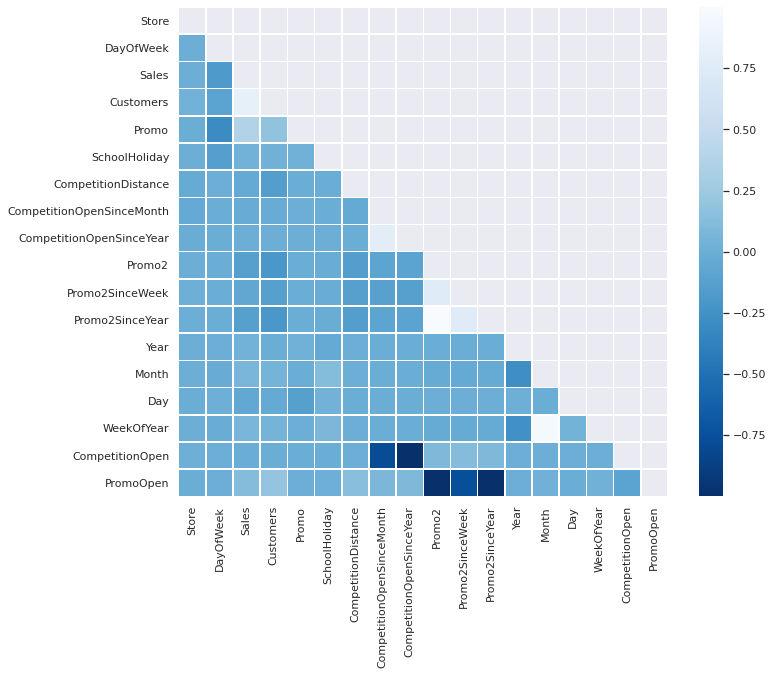

In [ ]:
# Compute the correlation matrix 
corr_all = train_store.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "Blues_r")      
plt.show()

As mentioned before, we have a strong positive correlation between the amount of ``Sales`` and ``Customers`` of a store. We can also observe a positive correlation between the fact that the store had a running promotion (``Promo`` equal to 1) and amount of ``Customers``.

However, as soon as the store continues a consecutive promotion (``Promo2`` equal to 1) the number of ``Customers`` and ``Sales`` seems to stay the same or even decrease, which is described by the pale negative correlation on the heatmap. The same negative correlation is observed between the presence of the promotion in the store and the day of a week.

In [ ]:
# # sale per customer trends
# sns.factorplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
#                col = 'Promo', 
#                row = 'Promo2',
#                hue = 'Promo2',
#                palette = 'plasma');

**There are several things here:**
* In case of no promotion, both ``Promo`` and ``Promo2`` are equal to 0, ``Sales`` tend to peak on Sunday (!). Though we should note that ``StoreType`` C doesn't work on Sundays. So it is mainly data from ``StoreType`` A, B and D.
* On the contrary, stores that run the promotion tend to make most of the Sales on Monday. This fact could be a good indicator for Rossmann marketing campaigns. The same trend follow the stores which have both promotion at the same time (``Promo`` and ``Promo2`` are equal to 1).
* ``Promo2`` alone doesn't seem to be correlated to any significant change in the ``Sales`` amount. This can be also prooved by the blue pale area on the heatmap above.

<hr>

**Conclusions of Data Analysis**

* The most selling and crowded StoreType is A.
* The best "Sale per Customer" StoreType D indicates to the higher Buyer Cart. To benefit from this fact, Rossmann can consider proposing bigger variety of its products.
* Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for "small" things. Eventhough this StoreType generated the least amount of sales and customers over the whole period, it shows a great potential.
* Customers tends to buy more on Modays when there's one promotion (Promo) and on Sundays when there's no promotion at all (both Promo and Promo1 are equal to 0).
* Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

# Feature engineering <a id="ch5"></a>

## Splitting into train and test

In [ ]:
train_store.head(1)

Store  DayOfWeek       Date  Sales  Customers  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a             1270.000   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                      2008       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  \
0                0                0             0  2015      7   31   

   WeekOfYear  CompetitionOpen  PromoOpen  
0          31               82  24187.750

In [ ]:
### find out what is the day 6 weeks ago
### WeekOfYear actual - 6
train_store[train_store['WeekOfYear'] == (31 - 6)].head(3)

Store  DayOfWeek       Date  Sales  Customers  Promo StateHoliday  \
41      1          6 2015-06-20   4097        494      0            0   
42      1          5 2015-06-19   4202        487      1            0   
43      1          4 2015-06-18   4645        498      1            0   

    SchoolHoliday StoreType Assortment  CompetitionDistance  \
41              0         c          a             1270.000   
42              0         c          a             1270.000   
43              0         c          a             1270.000   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
41                          9                      2008       0   
42                          9                      2008       0   
43                          9                      2008       0   

    Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  \
41                0                0             0  2015      6   20   
42                0                0             0  2015      6   19   
43                0                0             0  2015      6   18   

    WeekOfYear  CompetitionOpen  PromoOpen  
41          25               81  24186.250  
42          25               81  24186.250  
43          25               81  24186.250

In [ ]:
# training dataset
train = train_store[train_store['Date'] < '2015-06-19'] 
y_train = train['Sales']

# test dataset
test = train_store[train_store['Date'] >= '2015-06-19']
y_test = test['Sales']

print( 'Training Min Date: {}'.format( train['Date'].min() ) )
print( 'Training Max Date: {}'.format( train['Date'].max() ) )

print( '\nTest Min Date: {}'.format( test['Date'].min() ) )
print( 'Test Max Date: {}'.format( test['Date'].max() ) )

Training Min Date: 2013-01-01 00:00:00
Training Max Date: 2015-06-18 00:00:00

Test Min Date: 2015-06-19 00:00:00
Test Max Date: 2015-07-31 00:00:00


In [ ]:
train.shape, y_train.shape

((802942, 23), (802942,))

In [ ]:
train.head()

Store  DayOfWeek       Date  Sales  Customers  Promo StateHoliday  \
43      1          4 2015-06-18   4645        498      1            0   
44      1          3 2015-06-17   4000        476      1            0   
45      1          2 2015-06-16   4852        503      1            0   
46      1          1 2015-06-15   5518        586      1            0   
48      1          6 2015-06-13   4256        502      0            0   

    SchoolHoliday StoreType Assortment  CompetitionDistance  \
43              0         c          a             1270.000   
44              0         c          a             1270.000   
45              0         c          a             1270.000   
46              0         c          a             1270.000   
48              0         c          a             1270.000   

    CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
43                          9                      2008       0   
44                          9                      2008       0   
45                          9                      2008       0   
46                          9                      2008       0   
48                          9                      2008       0   

    Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  \
43                0                0             0  2015      6   18   
44                0                0             0  2015      6   17   
45                0                0             0  2015      6   16   
46                0                0             0  2015      6   15   
48                0                0             0  2015      6   13   

    WeekOfYear  CompetitionOpen  PromoOpen  
43          25               81  24186.250  
44          25               81  24186.250  
45          25               81  24186.250  
46          25               81  24186.250  
48          24               81  24186.000

## Cross-validation for time series

**A brief theorist**

A more sophisticated version of training/test sets is time series cross-validation. In this procedure, there are a series of test sets, each consisting of a single observation. The corresponding training set consists only of observations that occurred prior to the observation that forms the test set. Thus, no future observations can be used in constructing the forecast. Since it is not possible to obtain a reliable forecast based on a small training set, the earliest observations are not considered as test sets.

The following diagram illustrates the series of training and test sets, where the blue observations form the training sets, and the orange observations form the test sets.



<center>
    <img src="https://64.media.tumblr.com/3ff6e9a16ca7516a025cbfad5adf733a/fcd26a5d1ee7515e-6d/s1280x1920/d856d6dc361b275aa4b1a6578b7068cb6cebdce2.jpg" width="700" alt="Error 404"/>
</center>

The forecast accuracy is computed by averaging over the test sets. This procedure is sometimes known as [“evaluation on a rolling forecasting origin”](https://otexts.com/fpp3/tscv.html) because the “origin” at which the forecast is based rolls forward in time.

With time series forecasting, one-step forecasts may not be as relevant as multi-step forecasts. In this case, the cross-validation procedure based on a rolling forecasting origin can be modified to allow multi-step errors to be used. Suppose that we are interested in models that produce good  
4
 -step-ahead forecasts. Then the corresponding diagram is shown below.

<center>
    <img src="https://64.media.tumblr.com/3092ad557dbad644b797fe640acb32a4/fcd26a5d1ee7515e-7e/s1280x1920/682779614f6584838d9eb13212f95872d0ee6e6a.jpg" width="700" alt="Error 404"/>
</center>

# Modeling<a id="ch6"></a>

> **Goal:** Forecast sales for the next 6 weeks.



## What techniques may help answer these questions?
### Statistical models
*   **Ignore the time-series aspect completely and model using traditional statistical modeling toolbox.** 
  *   *Examples.* Regression-based models.  
*   **Univariate statistical time-series modeling.**
  *   *Examples.* Averaging and smoothing models, ARIMA models.
*   **Slight modifications to univariate statistical time-series modeling.**
  *    *Examples.* External regressors, multi-variate models.
*   **Additive or component models.**
  *  *Examples.* Facebook Prophet package.
*   **Structural time series modeling.**
  *    *Examples.* Bayesian structural time series modeling, hierarchical time series modeling.

### Machine learning models

*   **Ignore the time-series aspect completely and model using traditional machine learning modeling toolbox.** 
  *   *Examples.* Support Vector Machines (SVMs), Random Forest Regression, Gradient-Boosted Decision Trees (GBDTs).
*   **Hidden markov models (HMMs).**
*   **Other sequence-based models.**
*   **Gaussian processes (GPs).**
*   **Recurrent neural networks (RNNs).**
  
### Additional data considerations before choosing a model
*   Whether or not to incorporate external data
*   Whether or not to keep as univariate or multivariate (i.e., which features and number of features)
*   Outlier detection and removal
*   Missing value imputation

## Baseline

**Know Your Metrics**

**MAPE - Mean Absolute Percentage Error**

The [mean absolute percentage error](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics. It usually expresses the accuracy as a ratio defined by the formula:

$$\text{MAPE}=\frac{100}{n} \sum^n_{t=1} \left | \frac{A_t - F_t}{A_t} \right |$$

where $A_t$ is the actual value and $F_t$ is the forecast value. Their difference is divided by the actual value $A_t$. The absolute value in this ratio is summed for every forecasted point in time and divided by the number of fitted points $n$.

In [ ]:
def calculate_mape(y_true, y_pred):
    """ Calculate mean absolute percentage error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_mpe(y_true, y_pred):
    """ Calculate mean percentage error (MPE)"""
    return np.mean((y_true - y_pred) / y_true) * 100

def calculate_mae(y_true, y_pred):
    """ Calculate mean absolute error (MAE)"""
    return np.mean(np.abs(y_true - y_pred)) * 100

def calculate_rmse(y_true, y_pred):
    """ Calculate root mean square error (RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def print_error_metrics(y_true, y_pred):
    print('MAPE: %f'%calculate_mape(y_true, y_pred))
    print('MPE: %f'%calculate_mpe(y_true, y_pred))
    print('MAE: %f'%calculate_mae(y_true, y_pred))
    print('RMSE: %f'%calculate_rmse(y_true, y_pred))
    return

def model_error(model_name, y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    mae = np.mean(np.abs(y_true - y_pred)) * 100
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))

    return pd.DataFrame({'Model Name': model_name,
                           'MAPE': mape, 
                           'MPE': mpe, 
                           'MAE': mae,
                           'RMSE': rmse}, index=[0])

In [ ]:
def days_between(d1, d2):
    """ Calculate the number of days between two dates. 
       D1 is start date (inclusive) and d2 is end date
       (inclusive) as well """
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    delta = d2 - d1

    return abs(delta.days + 1)


### function: 'days_between(d1, d2)' 
### an example to illustrate usage

start_date = '2021-08-18'  # start date
end_date = '2022-02-15'    # end date

### applying function
days_between(start_date, end_date)

182

### Average model

In [ ]:
### evaluation dataframe: slice of 'X_test' and copy 
aux1 = test.copy()
aux1['Sales'] = y_test.copy()

### aux1: X_test dataframe copied
### aux2: main dataframe gropuped by 'Store id' with added up 'Sales'

aux2 = aux1[['Store', 'Sales']].groupby('Store').mean().reset_index().rename(
    columns={'Sales':'yhat'})
aux1 = pd.merge( aux1, aux2, how='left', on='Store' )
yhat_baseline = aux1['yhat']

In [ ]:
print_error_metrics(aux1['Sales'], aux1['yhat'])

MAPE: 21.698544
MPE: -6.937847
MAE: 137096.109903
RMSE: 1817.747476


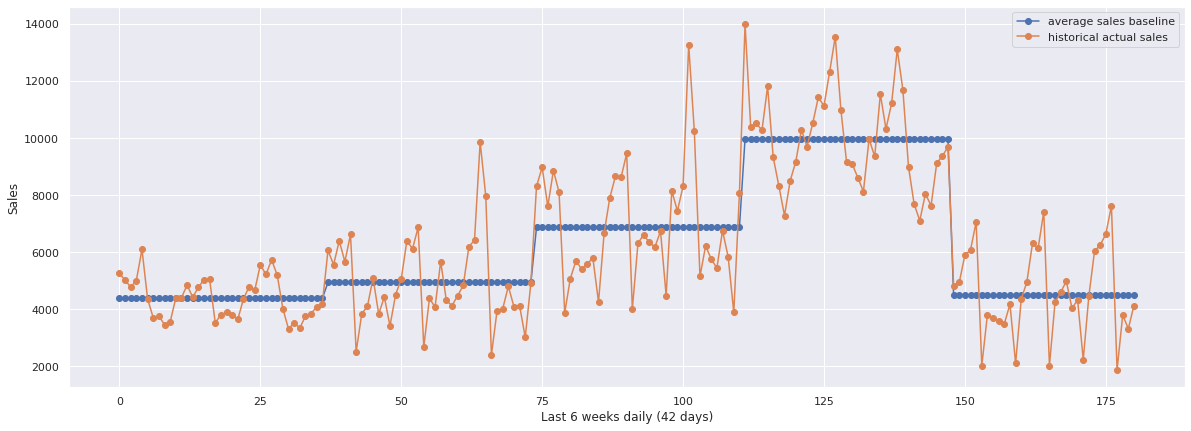

In [ ]:
### data for plot: grabbing a sample
### df: aux3

aux3 = aux1[0:181].copy()

plt.figure(figsize=(20,7))
plt.plot(aux3.yhat.values, 'o-', label="average sales baseline")
plt.plot(aux3['Sales'].values, 'o-', label="historical actual sales")
plt.xlabel("Last 6 weeks daily (42 days)")
plt.ylabel("Sales")
plt.legend();

In [ ]:
baseline_eval = model_error('Average Model', aux1['Sales'], aux1['yhat'])
baseline_eval

Model Name   MAPE    MPE        MAE     RMSE
0  Average Model 21.699 -6.938 137096.110 1817.747

## Facebook's Prophet <a id="ch6.1"></a>

### Basic description
[Prophet](https://facebook.github.io/prophet/) is a decomposable time series model with 3 main model components and one error term:

$$y(t) = g(t) + s(t) + h(t) + \epsilon_{t}$$

* trend g(t) - non-periodic changes of the value
* seasonality s(t) - periodic changes (e.g. weekly and yearly) 
* holidays h(t) - effect of holidays (e.g. irregular patterns over one or more days)
* $\epsilon_{t}$ - error term that describes any idiosyncratic changes (assumed to be normally distributed)

### Uncertainty estimates

By default it returns uncertainty intervals of the predicted value $y_{hat}$ consisting of three different sources:
* uncertainty in the trend,
* uncertainty in the seasonality estimates,
* additional observation noise

To compute the uncertainty in the trend it is assumed that the average frequency and magnitude of trend changes will be the same in the future as observed in the history. This trend changes are projected forward into the future and by computing their distribution uncertainty intervals are obtained. **By default Prophet only returns uncertainty in the trend and observation noise!**

In [ ]:
### uncomment to install prophet
#!pip install fbprophet
from fbprophet import Prophet

**Necessary modifications unique to this package**

In [ ]:
### modify params for prophet predict
sales_df = train.loc[:, ['Date', 'Sales']]

### reverse to the order: from 2013 to 2015
sales_df = sales_df.sort_index(ascending = False)

# from the prophet documentation every variables should have specific names
sales_df = sales_df.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales_df.head()

ds     y
1017207 2013-01-02  3697
1017206 2013-01-03  4297
1017205 2013-01-04  4540
1017204 2013-01-05  4771
1017202 2013-01-07  6905

In [ ]:
def sales_prediction(store_id, df_prophet, periods):
    """Run prophet"""
    df_prophet = df_prophet[df_prophet['Store'] == store_id]
    df_prophet = df_prophet[['Date', 'Sales']].rename(columns = {'Date': 'ds',
                                                             'Sales': 'y'})
    df_prophet = df_prophet.sort_values(by = 'ds')
    
    model = Prophet(yearly_seasonality=True, daily_seasonality=True)
    model.fit(df_prophet)    

    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    
    figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
    figure2 = model.plot_components(forecast) 
    
    return df_prophet, forecast

In [ ]:
# variables for Querying

store_id = 85
df_prophet = train
periods = 43

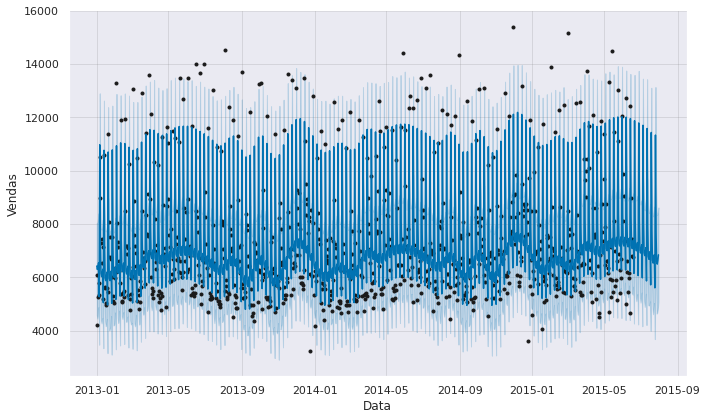

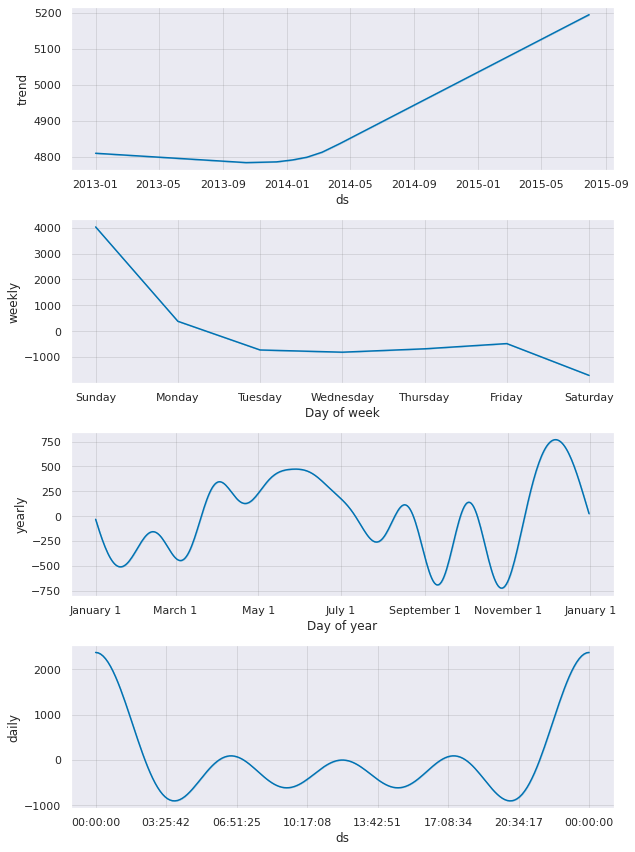

In [ ]:
df_origin, df_prediction = sales_prediction(store_id, df_prophet, periods)

In [ ]:
### reverse to the order: from 2013 to 2015
df_prediction = df_prediction.sort_index(ascending = False)
df_prediction.head(2)

ds    trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
941 2015-07-31 5194.455    5082.933    8618.983     5193.203     5195.928   
940 2015-07-30 5193.703    4817.318    8448.489     5192.503     5195.106   

     additive_terms  additive_terms_lower  additive_terms_upper    daily  \
941        1647.297              1647.297              1647.297 2369.620   
940        1435.248              1435.248              1435.248 2369.620   

     daily_lower  daily_upper   weekly  weekly_lower  weekly_upper   yearly  \
941     2369.620     2369.620 -480.497      -480.497      -480.497 -241.826   
940     2369.620     2369.620 -682.627      -682.627      -682.627 -251.744   

     yearly_lower  yearly_upper  multiplicative_terms  \
941      -241.826      -241.826                 0.000   
940      -251.744      -251.744                 0.000   

     multiplicative_terms_lower  multiplicative_terms_upper     yhat  
941                       0.000                       0.000 6841.752  
940                       0.000                       0.000 6628.951

In [ ]:
### store_id: 56
test = test[test['Store'] == store_id]
train = train[train['Store'] == store_id]

df_prediction = df_prediction[['ds', 'yhat']].rename(columns={'ds':'Date'})
df_prediction.head()

Date     yhat
941 2015-07-31 6841.752
940 2015-07-30 6628.951
939 2015-07-29 6491.210
938 2015-07-28 6573.503
937 2015-07-27 7682.798

In [ ]:
evaluation_df = pd.merge(test, df_prediction, how='left', on='Date')
evaluation_df.head(3)

Store  DayOfWeek       Date  Sales  Customers  Promo StateHoliday  \
0     85          5 2015-07-31   7791        971      1            0   
1     85          4 2015-07-30   7187       1000      1            0   
2     85          3 2015-07-29   7719        889      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         b          a             1870.000   
1              1         b          a             1870.000   
2              1         b          a             1870.000   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                         10                      2011       0   
1                         10                      2011       0   
2                         10                      2011       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  Year  Month  Day  \
0                0                0             0  2015      7   31   
1                0                0             0  2015      7   30   
2                0                0             0  2015      7   29   

   WeekOfYear  CompetitionOpen  PromoOpen     yhat  
0          31               45  24187.750 6841.752  
1          31               45  24187.750 6628.951  
2          31               45  24187.750 6491.210

In [ ]:
print_error_metrics(y_true = evaluation_df['Sales'], y_pred = evaluation_df['yhat'])

MAPE: 14.130161
MPE: -5.368830
MAE: 94837.466451
RMSE: 1077.474066


In [ ]:
evaluation_df.shape

(43, 24)

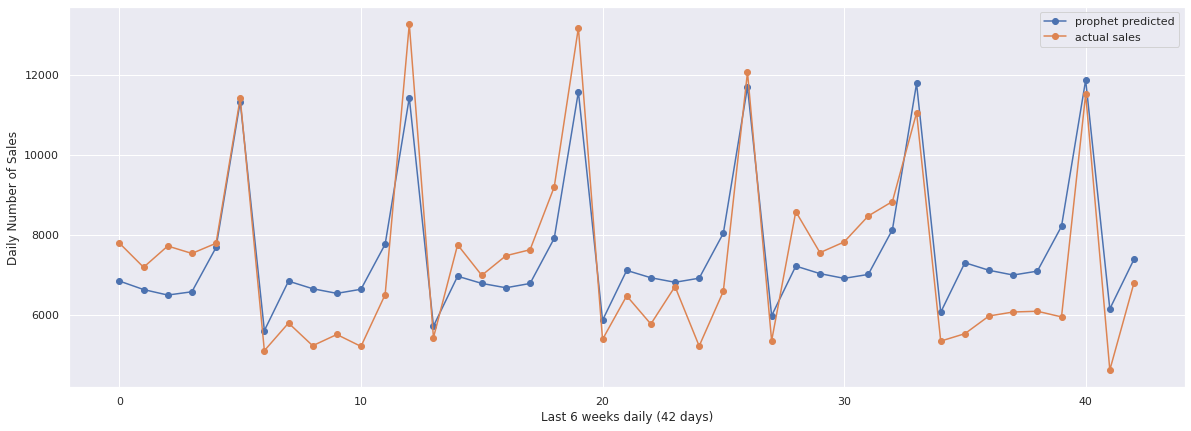

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(evaluation_df.yhat.values, 'o-', label="prophet predicted")
plt.plot(evaluation_df['Sales'].values, 'o-', label="actual sales")
plt.xlabel("Last 6 weeks daily (42 days)")
plt.ylabel("Daily Number of Sales")
plt.legend();

In [ ]:
prophet_eval = model_error('Prophet', evaluation_df['Sales'], evaluation_df['yhat'])
prophet_eval

Model Name   MAPE    MPE       MAE     RMSE
0    Prophet 14.130 -5.369 94837.466 1077.474

In [ ]:
df_prediction.head()

Date     yhat
941 2015-07-31 6841.752
940 2015-07-30 6628.951
939 2015-07-29 6491.210
938 2015-07-28 6573.503
937 2015-07-27 7682.798

In [ ]:
### submission data set predictions
df_prediction.head(42).to_csv('yhat_forecast_sales.csv')

### Cross validation

In [ ]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [ ]:
# df_cv = cross_validation(train_store, initial='730 days', period='180 days', horizon='7 days')
# df_cv.head()z

In [ ]:
# performance_metrics(df_cv)

In [ ]:
# plot_cross_validation_metric(df_vc, 'mape')

### Quick Time Series Analysis and Forecasts with Prophet

**source:** [original code](https://www.kaggle.com/elenapetrova/time-series-analysis-and-forecasts-with-prophet)

In [ ]:
# importing data
df = pd.read_csv("train.csv", low_memory = False)

# remove closed stores and those with no sales
df = df[(df["Open"] != 0) & (df['Sales'] != 0)]

# sales for the store number 1 (StoreType C)
sales = df[df.Store == 1].loc[:, ['Date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [ ]:
# from the prophet documentation every variables should have specific names
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales.head()

ds     y
1014980 2013-01-02  5530
1013865 2013-01-03  4327
1012750 2013-01-04  4486
1011635 2013-01-05  4997
1009405 2013-01-07  7176

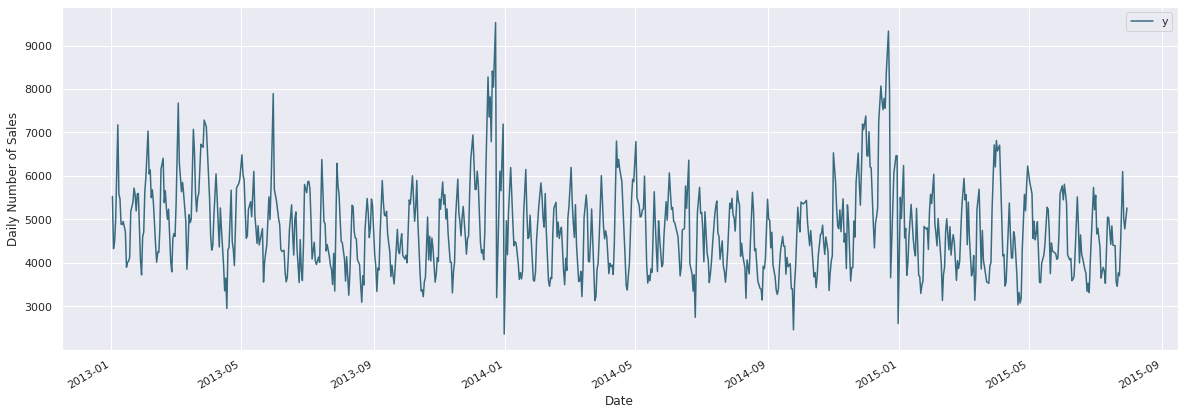

In [ ]:
# plot daily sales
c = '#386B7F' # basic color for plots
ax = sales.set_index('ds').plot(figsize = (20, 7), color = c)
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show();

**Modeling Holidays**

Prophet also allows to [model for holidays](https://facebookincubator.github.io/prophet/docs/holiday_effects.html), and that's what we do here.

The StateHoliday variable in the dataset indicates a state holiday, at which all stores are normally closed. There are also school holidays in the dataset at which ceratin stores are also closing their doors.

In [ ]:
# create holidays dataframe
state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      
holidays.head()

holiday         ds
0  state_holiday 2015-06-04
1  state_holiday 2015-06-04
2  state_holiday 2015-06-04
3  state_holiday 2015-06-04
4  state_holiday 2015-06-04

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95, 
                   holidays = holidays)
my_model.fit(sales)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

print("First week to forecast.")
future_dates.tail(7)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


First week to forecast.


ds
816 2015-09-05
817 2015-09-06
818 2015-09-07
819 2015-09-08
820 2015-09-09
821 2015-09-10
822 2015-09-11

In [ ]:
# # predictions
# forecast = my_model.predict(future_dates)

# # preditions for last week
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [ ]:
# fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

In [ ]:
# # visualizing predicions
# my_model.plot(forecast);

As we see Prophet catches the trends and most of the time gets future values right.

One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly and yearly patterns of the time series plus manyally included holidayes contribute to the overall forecasted values:

In [ ]:
# my_model.plot_components(forecast);

The first plot shows that the monthly sales of store number 1 has been linearly decreasing over time and the second shows the holiays gaps included in the model. The third plot highlights the fact that the weekly volume of last week sales peaks towards the Monday of the next week, while the forth plot shows that the most buzy season occurs during the Christmas holidays.

**Conclusion of Time Series forecasting**

During this part, we discussed time series analysis with .seasonal_decompose(), ACF and PCF plots and fitted forecasting model using a new procedure by Facebook Prophet.

We can now present main advantages and drawbacks of time series forecasting:

***Advantages***

* A powerful tool for the time series forecasting as it accounts for time dependencies, seasonalities and holidays (Prophet: manually).
* Easily implemented with R ``auto.arima()`` from ``forecast`` package, which runs a complex grid search and sophisticated algorithm behind the scene.

***Drawbacks***

* Doesn't catch interactions between external features, which could improve the forecasting power of a model. In our case, these variables are ``Promo`` and ``CompetitionOpen``.
* Even though Prophet offers an automated solution for ARIMA, this methodology is under development and not completely stable.
* Fitting seasonal ARIMA model needs 4 to 5 whole seasons in the dataset, which can be the biggest drawback for new companies.
* Seasonal ARIMA in Python has 7 hyper parameters which can be tuned only manually affecting significantly the speed of the forecasting process.

## Look at stationarity

Most time-series models assume that the underlying time-series data is **stationary**.  This assumption gives us some nice statistical properties that allows us to use various models for forecasting.

**Stationarity** is a statistical assumption that a time-series has:
*   **Constant mean**
*   **Constant variance**
*   **Autocovariance does not depend on time**

More simply put, if we are using past data to predict future data, we should assume that the data will follow the same general trends and patterns as in the past.  This general statement holds for most training data and modeling tasks.

**There are some good diagrams and explanations on stationarity [here](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/) and [here](https://people.duke.edu/~rnau/411diff.htm).**

Sometimes we need to transform the data in order to make it stationary.  However, this  transformation then calls into question if this data is truly stationary and is suited to be modeled using these techniques.

**Looking at our data:**
- Rolling mean and standard deviation look like they change over time.  There may be some de-trending and removing seasonality involved. Based on **Dickey-Fuller test**, because p = 0.31, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that we fail to reject the null hypothesis that our **time series is not stationary**.

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# def test_stationarity(df, y):
#     """
#     Test stationarity using moving average statistics and Dickey-Fuller test
#     Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
#     """
    
#     # Determing rolling statistics
#     rolmean = df[ts].rolling(window = 12, center = False).mean()
#     rolstd = df[ts].rolling(window = 12, center = False).std()
    
#     # Plot rolling statistics:
#     orig = plt.plot(df[ts], 
#                     color = 'blue', 
#                     label = 'Original')
#     mean = plt.plot(rolmean, 
#                     color = 'red', 
#                     label = 'Rolling Mean')
#     std = plt.plot(rolstd, 
#                    color = 'black', 
#                    label = 'Rolling Std')
#     plt.legend(loc = 'best')
#     plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
#     plt.xticks(rotation = 45)
#     plt.show(block = False)
#     plt.close()
    
#     # Perform Dickey-Fuller test:
#     # Null Hypothesis (H_0): time series is not stationary
#     # Alternate Hypothesis (H_1): time series is stationary
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(df[ts], 
#                       autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], 
#                          index = ['Test Statistic',
#                                   'p-value',
#                                   '# Lags Used',
#                                   'Number of Observations Used'])
#     for key, value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [ ]:
# test_stationarity(df = df_example, y = 'y')

### Correct for stationarity

It is common for time series data to have to correct for non-stationarity. 

2 common reasons behind non-stationarity are:

1. **Trend** – mean is not constant over time.
2. **Seasonality** – variance is not constant over time.

There are ways to correct for trend and seasonality, to make the time series stationary.

**What happens if you do not correct for these things?**

Many things can happen, including:
- Variance can be mis-specified
- Model fit can be worse.  
- Not leveraging valuable time-dependent nature of the data.  

Here are some resources on the pitfalls of using traditional methods for time series analysis.  
[Quora link](https://www.quora.com/Why-cant-you-use-linear-regression-for-time-series-data)  
[Quora link](https://www.quora.com/Data-Science-Can-machine-learning-be-used-for-time-series-analysis)  
## Eliminating trend and seasonality
*   **Transformation**
  *   *Examples.* Log, square root, etc.
  *   We are going to look at log.
*   **Smoothing**
  *  *Examples.* Weekly average, monthly average, rolling averages.
  *   We are going to look at weekly average.
*   **Differencing**
  *  *Examples.* First-order differencing.
  *   We are going to look at first-order differencing.
*   **Polynomial Fitting**
  *  *Examples.* Fit a regression model.
*   **Decomposition**

### Transformation, Smoothing, and Differencing
**Looking at our data:**
- Applying log transformation, weekly moving average smoothing, and differencing made the data more stationary over time. Based on **Dickey-Fuller test**, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the **time series is stationary**.

In [ ]:
# def plot_transformed_data(df, ts, ts_transform):
#   """
#   Plot transformed and original time series data
#   """
#   # Plot time series data
#   f, ax = plt.subplots(1,1)
#   ax.plot(df[ts])
#   ax.plot(df[ts_transform], color = 'red')

#   # Add title
#   ax.set_title('%s and %s time-series graph' %(ts, ts_transform))

#   # Rotate x-labels
#   ax.tick_params(axis = 'x', rotation = 45)

#   # Add legend
#   ax.legend([ts, ts_transform])
  
#   plt.show()
#   plt.close()
  
#   return

In [ ]:
# # Transformation - log ts
# df_example['ts_log'] = df_example['ts'].apply(lambda x: np.log(x))

# # Transformation - 7-day moving averages of log ts
# df_example['ts_log_moving_avg'] = df_example['ts_log'].rolling(window = 7,
#                                                                center = False).mean()

# # Transformation - 7-day moving average ts
# df_example['ts_moving_avg'] = df_example['ts'].rolling(window = 7,
#                                                        center = False).mean()

# # Transformation - Difference between logged ts and first-order difference logged ts
# # df_example['ts_log_diff'] = df_example['ts_log'] - df_example['ts_log'].shift()
# df_example['ts_log_diff'] = df_example['ts_log'].diff()

# # Transformation - Difference between ts and moving average ts
# df_example['ts_moving_avg_diff'] = df_example['ts'] - df_example['ts_moving_avg']

# # Transformation - Difference between logged ts and logged moving average ts
# df_example['ts_log_moving_avg_diff'] = df_example['ts_log'] - df_example['ts_log_moving_avg']

# # Transformation - Difference between logged ts and logged moving average ts
# df_example_transform = df_example.dropna()

# # Transformation - Logged exponentially weighted moving averages (EWMA) ts
# df_example_transform['ts_log_ewma'] = df_example_transform['ts_log'].ewm(halflife = 7,
#                                                                          ignore_na = False,
#                                                                          min_periods = 0,
#                                                                          adjust = True).mean()

# # Transformation - Difference between logged ts and logged EWMA ts
# df_example_transform['ts_log_ewma_diff'] = df_example_transform['ts_log'] - df_example_transform['ts_log_ewma']

# # Display data
# display(df_example_transform.head())

# # Plot data
# plot_transformed_data(df = df_example, 
#                       ts = 'ts', 
#                       ts_transform = 'ts_log')
# # Plot data
# plot_transformed_data(df = df_example, 
#                       ts = 'ts_log', 
#                       ts_transform = 'ts_log_moving_avg')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts', 
#                       ts_transform = 'ts_moving_avg')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts_log', 
#                       ts_transform = 'ts_log_diff')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts', 
#                       ts_transform = 'ts_moving_avg_diff')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts_log', 
#                       ts_transform = 'ts_log_moving_avg_diff')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts_log', 
#                       ts_transform = 'ts_log_ewma')

# # Plot data
# plot_transformed_data(df = df_example_transform, 
#                       ts = 'ts_log', 
#                       ts_transform = 'ts_log_ewma_diff')

# # Perform stationarity test
# test_stationarity(df = df_example_transform, 
#                   ts = 'ts_log')

# # Perform stationarity test
# test_stationarity(df = df_example_transform, 
#                   ts = 'ts_moving_avg')

# # Perform stationarity test
# test_stationarity(df = df_example_transform, 
#                   ts = 'ts_log_moving_avg')

# # Perform stationarity test
# test_stationarity(df = df_example_transform,
#                   ts = 'ts_log_diff')

# # Perform stationarity test
# test_stationarity(df = df_example_transform,
#                   ts = 'ts_moving_avg_diff')

# # Perform stationarity test
# test_stationarity(df = df_example_transform,
#                   ts = 'ts_log_moving_avg_diff')

# # Perform stationarity test
# test_stationarity(df = df_example_transform, 
#                   ts = 'ts_log_ewma')

# # Perform stationarity test
# test_stationarity(df = df_example_transform,
#                   ts = 'ts_log_ewma_diff')

### Decomposition: trend, seasonality, residuals
**Looking at our data:**
- De-trending and de-seasonalizing made the data (i.e., the residuals) more stationary over time. Based on **Dickey-Fuller test**, because p = < 0.05, we fail to reject the null hypothesis (that the time series is not stationary) at the p = 0.05 level, thus concluding that the **time series is stationary**.

In [ ]:
# def plot_decomposition(df, ts, trend, seasonal, residual):
#   """
#   Plot time series data
#   """
#   f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex = True)

#   ax1.plot(df[ts], label = 'Original')
#   ax1.legend(loc = 'best')
#   ax1.tick_params(axis = 'x', rotation = 45)

#   ax2.plot(df[trend], label = 'Trend')
#   ax2.legend(loc = 'best')
#   ax2.tick_params(axis = 'x', rotation = 45)

#   ax3.plot(df[seasonal],label = 'Seasonality')
#   ax3.legend(loc = 'best')
#   ax3.tick_params(axis = 'x', rotation = 45)

#   ax4.plot(df[residual], label = 'Residuals')
#   ax4.legend(loc = 'best')
#   ax4.tick_params(axis = 'x', rotation = 45)
#   plt.tight_layout()

#   # Show graph
#   plt.suptitle('Trend, Seasonal, and Residual Decomposition of %s' %(ts), 
#                x = 0.5, 
#                y = 1.05, 
#                fontsize = 18)
#   plt.show()
#   plt.close()
  
#   return

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(df_example_transform['ts_log'], freq = 365)

# df_example_transform.loc[:,'trend'] = decomposition.trend
# df_example_transform.loc[:,'seasonal'] = decomposition.seasonal
# df_example_transform.loc[:,'residual'] = decomposition.resid

# plot_decomposition(df = df_example_transform, 
#                    ts = 'ts_log', 
#                    trend = 'trend',
#                    seasonal = 'seasonal', 
#                    residual = 'residual')

# test_stationarity(df = df_example_transform.dropna(), ts = 'residual')

## Autoregressive Integrated Moving Average (ARIMA)

### ARIMA concept

##  LSTM and bootstrapped residuals

### Basic idea <a class="anchor" id="basic_idea"></a>

* Here we are using the Frequentist perspective of probability:
    * The model parameters $w$ are assumed to be fixed and we estimate it using our estimator. 
    * The estimation depends on the dataset D we observe and consequently we can obtain error bars for our estimated parameters $w_{est}$ by considering multiple datasets.
    * One way to do this is by creating new datasets, for example with bootstrapping.
* We are creating new datasets by using bootstrapped residuals:
    * We only assume uncorrelated residuals that need not be normally distributed.

**Imports**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
class MyLSTM(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, batch_size, num_layers=1, output_dim=1):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size=self.input_dim,
                            hidden_size=self.hidden_dim,
                            num_layers=self.num_layers,
                            dropout = 0.25)
        self.linear = nn.Linear(self.hidden_dim, output_dim)
        
    def init_hidden(self):
        self.h_zero = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).to(device)
        self.c_zero = torch.zeros(self.num_layers, self.batch_size, self.hidden_dim).to(device)
    
    def forward(self, x):
        lstm_output, (h_n, c_n) = self.lstm(x.view(len(x), self.batch_size, -1),
                                           (self.h_zero, self.c_zero))
        last_time_step = lstm_output.view(self.batch_size, len(x), self.hidden_dim)[-1]
        pred = self.linear(last_time_step)
        return pred
    

def train_model(model, data_dict, lr=1e-4, num_epochs=500):
    
    loss_fun = torch.nn.MSELoss(reduction="mean")
    optimiser = torch.optim.Adam(model.parameters(), lr=lr)
    
    train_losses = np.zeros(num_epochs)
    phases = ["train", "eval"]
    losses_dict = {"train": [], "eval": []}
    predictions_dict = {"train": [], "eval": [] }
    
    for n in range(num_epochs):
        
        for phase in phases:
            
            x = data_dict[phase]["input"].to(device, dtype=torch.float)
            y = data_dict[phase]["target"].to(device, dtype=torch.float)
            
            if phase == "train":
                model.train()
            else:
                model.eval()
        
            optimiser.zero_grad()
            
            model.init_hidden()
            y_pred = model(x)
            
            if n == (num_epochs-1):
                predictions_dict[phase] = y_pred.float().cpu().detach().numpy()
            
            loss = loss_fun(y_pred.float(), y)
            losses_dict[phase].append(loss.item())
            
            if n % 50 == 0:
                print("{} loss: {}".format(phase, loss.item()))
            
            if phase == 'train':
                loss.backward()
                optimiser.step()
        
    return losses_dict, predictions_dict

def create_sequences(timeseries, seq_len):
    inputs = []
    targets = []
    
    max_steps = len(timeseries) - (seq_len+1)
    
    for t in range(max_steps):
        x = timeseries[t:(t+seq_len)]
        y = timeseries[t+seq_len]
        inputs.append(x)
        targets.append(y)
    
    return np.array(inputs), np.array(targets)

## PyData LA 2018 Tutorial

In [ ]:
def do_lstm_model(df, 
                  ts, 
                  look_back, 
                  epochs, 
                  type_ = None, 
                  train_fraction = 0.67):
  """
   Create LSTM model
   Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
  """
  # Import packages
  import numpy
  import matplotlib.pyplot as plt
  from pandas import read_csv
  import math
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.layers import LSTM
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import mean_squared_error

  # Convert an array of values into a dataset matrix
  def create_dataset(dataset, look_back=1):
    """
    Create the dataset
    """
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

  # Fix random seed for reproducibility
  numpy.random.seed(7)

  # Get dataset
  dataset = df[ts].values
  dataset = dataset.astype('float32')

  # Normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset.reshape(-1, 1))
  
  # Split into train and test sets
  train_size = int(len(dataset) * train_fraction)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  
  # Reshape into X=t and Y=t+1
  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  
  # Reshape input to be [samples, time steps, features]
  if type_ == 'regression with time steps':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  elif type_ == 'stacked with memory between batches':
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
  else:
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  # Create and fit the LSTM network
  batch_size = 1
  model = Sequential()
  
  if type_ == 'regression with time steps':
    model.add(LSTM(4, input_shape=(look_back, 1)))
  elif type_ == 'memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  elif type_ == 'stacked with memory between batches':
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
  else:
    model.add(LSTM(4, input_shape=(1, look_back)))
  
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    for i in range(100):
      model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
      model.reset_states()
  else:
    model.fit(trainX, 
              trainY, 
              epochs = epochs, 
              batch_size = 1, 
              verbose = 2)
  
  # Make predictions
  if type_ == 'memory between batches' or type_ == 'stacked with memory between batches':
    trainPredict = model.predict(trainX, batch_size=batch_size)
    testPredict = model.predict(testX, batch_size=batch_size)
  else:
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
  
  # Invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  
  # Calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))
  
  # Shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  
  # Shift test predictions for plotting
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  
  # Plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()
  plt.close()
  
  return

In [ ]:
# # LSTM Network for Regression
# do_lstm_model(df = df_prophet, 
#               ts = 'y', 
#               look_back = 1, 
#               epochs = 5)

# # LSTM for Regression Using the Window Method
# do_lstm_model(df = df_prophet, 
#               ts = 'y', 
#               look_back = 3, 
#               epochs = 5)

# # LSTM for Regression with Time Steps
# do_lstm_model(df = df_prophet, 
#               ts = 'y', 
#               look_back = 3, 
#               epochs = 5, 
#               type_ = 'regression with time steps')

# # # LSTM with Memory Between Batches
# # do_lstm_model(df = df_prophet, 
# #               ts = 'y', 
# #               look_back = 3, 
# #               epochs = 5, 
# #               type_ = 'memory between batches')

# # # Stacked LSTMs with Memory Between Batches
# # do_lstm_model(df = df_prophet, 
# #               ts = 'y', 
# #               look_back = 3, 
# #               epochs = 5, 
# #               type_ = 'stacked with memory between batches')

## Data Driven Growth

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
# from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

### modify params for prophet predict
sales_df = train_store.loc[:, ['Date', 'Sales']]

# from the prophet dosales_dfcumentation every variables should have specific names
sales_df = sales_df.rename(columns = {'Date': 'date',
                                'Sales': 'sales'})

#read the data in csv
df_sales = sales_df.copy()

#show first 10 rows
df_sales.head()

date  sales
0 2015-07-31   5263
1 2015-07-30   5020
2 2015-07-29   4782
3 2015-07-28   5011
4 2015-07-27   6102

In [ ]:
from datetime import datetime, timedelta, date

#represent month in date field as its first day
df_sales['date'] = df_sales['date'].dt.year.astype('str') + '-' + df_sales['date'].dt.month.astype('str') + '-01'
df_sales['date'] = pd.to_datetime(df_sales['date'])

#groupby date and sum the sales
df_sales = df_sales.groupby('date').sales.sum().reset_index()

In [ ]:
df_sales.head()

date      sales
0 2013-01-01  180132207
1 2013-02-01  171534275
2 2013-03-01  201180369
3 2013-04-01  183431432
4 2013-05-01  185411063

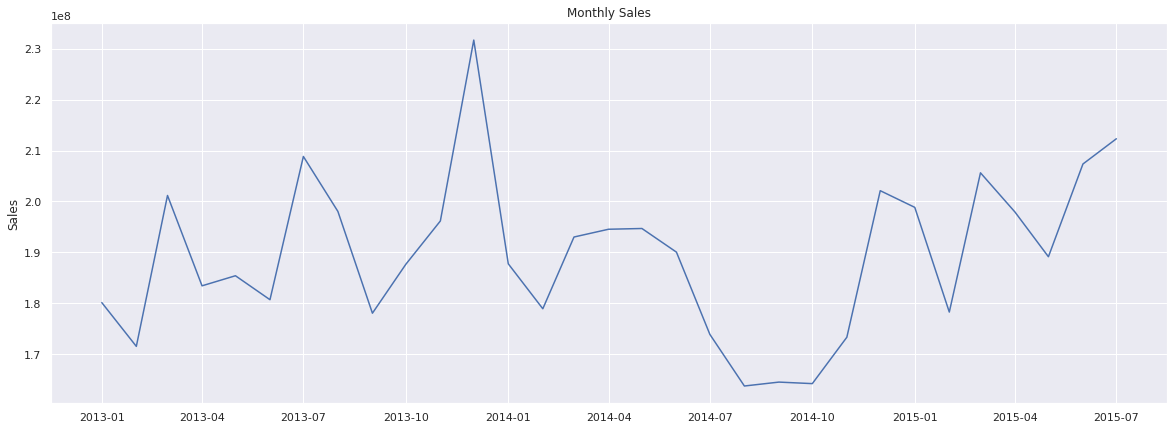

In [ ]:
plt.figure(figsize=(20,7))

plt.plot(df_sales.groupby('date')[['sales']].mean())

plt.title("Monthly Sales");
plt.ylabel("Sales")

plt.show();

Obviously, it is not stationary and has an increasing trend over the months. One method is to get the difference in sales compared to the previous month and build the model on it:

In [ ]:
#create a new dataframe to model the difference
df_diff = df_sales.copy()
#add previous sales to the next row
df_diff['prev_sales'] = df_diff['sales'].shift(1)
#drop the null values and calculate the difference
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['sales'] - df_diff['prev_sales'])
df_diff.head(10)

date      sales    prev_sales          diff
1  2013-02-01  171534275 180132207.000  -8597932.000
2  2013-03-01  201180369 171534275.000  29646094.000
3  2013-04-01  183431432 201180369.000 -17748937.000
4  2013-05-01  185411063 183431432.000   1979631.000
5  2013-06-01  180702351 185411063.000  -4708712.000
6  2013-07-01  208843882 180702351.000  28141531.000
7  2013-08-01  198042727 208843882.000 -10801155.000
8  2013-09-01  178053963 198042727.000 -19988764.000
9  2013-10-01  187662330 178053963.000   9608367.000
10 2013-11-01  196170924 187662330.000   8508594.000

Now we have the required dataframe for modeling the difference.

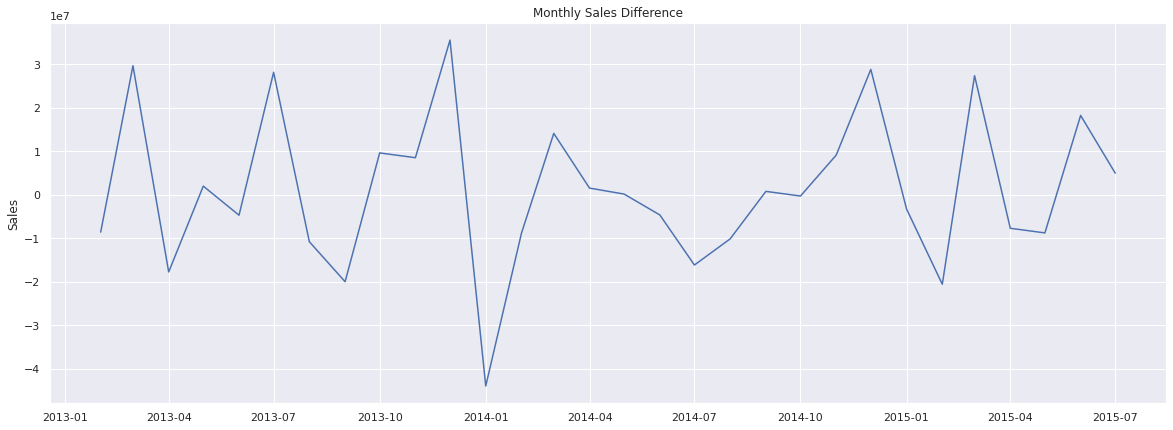

In [ ]:
plt.figure(figsize=(20,7))

plt.plot(df_diff.groupby('date')[['diff']].mean())

plt.title("Monthly Sales Difference");
plt.ylabel("Sales")

plt.show();

Perfect! Now we can start building our feature set. We need to use previous monthly sales data to forecast the next ones. The look-back period may vary for every model. Ours will be 12 for this example.
So what we need to do is to create columns from lag_1 to lag_12 and assign values by using shift() method:

In [ ]:
#create dataframe for transformation from time series to supervised
df_supervised = df_diff.drop(['prev_sales'],axis=1)
#adding lags
for inc in range(1,13):
    field_name = 'lag_' + str(inc)
    df_supervised[field_name] = df_supervised['diff'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)

In [ ]:
df_supervised.head()

date      sales         diff         lag_1         lag_2  \
0 2014-02-01  178924677 -8828110.000 -43957774.000  35539637.000   
1 2014-03-01  193019854 14095177.000  -8828110.000 -43957774.000   
2 2014-04-01  194544977  1525123.000  14095177.000  -8828110.000   
3 2014-05-01  194693257   148280.000   1525123.000  14095177.000   
4 2014-06-01  190047051 -4646206.000    148280.000   1525123.000   

          lag_3         lag_4         lag_5         lag_6         lag_7  \
0   8508594.000   9608367.000 -19988764.000 -10801155.000  28141531.000   
1  35539637.000   8508594.000   9608367.000 -19988764.000 -10801155.000   
2 -43957774.000  35539637.000   8508594.000   9608367.000 -19988764.000   
3  -8828110.000 -43957774.000  35539637.000   8508594.000   9608367.000   
4  14095177.000  -8828110.000 -43957774.000  35539637.000   8508594.000   

          lag_8         lag_9        lag_10        lag_11        lag_12  
0  -4708712.000   1979631.000 -17748937.000  29646094.000  -8597932.000  
1  28141531.000  -4708712.000   1979631.000 -17748937.000  29646094.000  
2 -10801155.000  28141531.000  -4708712.000   1979631.000 -17748937.000  
3 -19988764.000 -10801155.000  28141531.000  -4708712.000   1979631.000  
4   9608367.000 -19988764.000 -10801155.000  28141531.000  -4708712.000

# Evaluation <a id="ch8"></a>

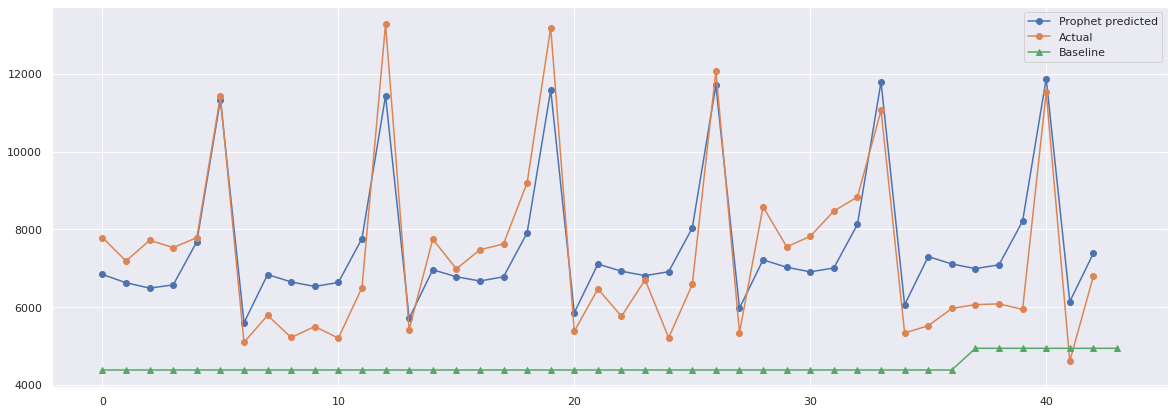

In [ ]:
plt.figure(figsize=(20,7))

plt.plot(evaluation_df.yhat.values, 'o-', label="Prophet predicted")
plt.plot(evaluation_df['Sales'].values, 'o-', label="Actual")
plt.plot(aux1.yhat[0:44].values, '^-', label="Baseline")

plt.legend();

<center> << coming soon >> </center>

## Report

| Model                  | MAPE     | RMSE    | MAE      |
| ------------------     | -------- | ------- | -------- | 
| Prophet            | ?        | ?       | ?        | 
| ARIMA             | ?        | ?       | ?        | 
| LSTM              | ?        | ?       | ?        |

## Real Performance: Cross Validation

In [ ]:
# modelling_result_cv = pd.concat( [lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv] )
# modelling_result_cv

## Interpretability <a id="ch9.1"></a>

<center> << apply shap and/or lime here >> </center>

# Deployment <a id="ch9"></a>

<center> << coming soon >> </center>

# Business Feedback <a id="ch10"></a>

<center> << This is about what the company should do. Like 'recommendations'.  >> </center>

## Average Selling Price (ASP)

What Is Average Selling Price (ASP)?
The term average selling price (ASP) refers to the price at which a certain class of good or service is typically sold. The average selling price is affected by the type of product and the product life cycle. The ASP is the average selling price of the product across multiple distribution channels, across a product category within a company, or even across the market as a whole.

<center> << wip >> </center>

# References <a id="ch10"></a>

**Business:**
* Stock Analysis: Forecasting Revenue and Growth. https://www.investopedia.com/articles/active-trading/022315/stock-analysis-forecasting-revenue-and-growth.asp
* Absolute Return vs. Relative Return: What's the difference? https://www.investopedia.com/ask/answers/118.asp
* Business Forecasting: Understanding the Basics. https://www.investopedia.com/articles/financial-theory/11/basics-business-forcasting.asp


**Model:**
* Prophet Documentation. https://facebook.github.io/prophet/
* Paper: Taylor SJ, Letham B. 2017. Forecasting at scale. PeerJ Preprints 5:e3190v2 https://doi.org/10.7287/peerj.preprints.3190v2
* The Fast Fourier Transform (FFT). https://bookdown.org/rdpeng/timeseriesbook/the-fast-fourier-transform-fft.html


**Textbook:**
* Forecasting hierarchical or grouped time series. https://otexts.com/fpp2/hierarchical.html
* Time series cross-validation. https://otexts.com/fpp3/tscv.html


paper: https://www.robots.ox.ac.uk/~sjrob/Pubs/philTransA_2012.pdf

# Change Log <a id="ch9.3"></a>

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                        |
| ----------------- | ------- | ------------- | --------------------------------------------------------- |
| 2021-08-10        | 1.0    | Brandon Aguiar | Initial steps                           |
| 2021-08-15        | 1.1    | Brandon Aguiar | First model implementation                        |
| 2021-08-16        | 1.2    | Brandon Aguiar | Evaluation and baseline added             |
| 2021-08-17        | 1.3    | Brandon Aguiar | EDA focused             |
| 2021-08-17        | 1.4   | Brandon Aguiar | Focus on times series development              |
| 2021-08-18        | 1.5   | Brandon Aguiar | Numbers removed from indexes               |
| 2021-08-18        | 1.6   | Brandon Aguiar | Moved to Colab because there was problems with Prophet               |
| 2021-08-24        | 1.7   | Brandon Aguiar | I added train/test split, cross validation and evaluated metrics    |
| 2021-08-25        | 1.8   | Brandon Aguiar | I cleaned the notebook for better readability    |
| 2021-08-25        | 1.9   | Brandon Aguiar | Started deleting a lot of stuff    |

> **Takeaway:** An old joke goes:
*  **Question:** “What does a data scientist seen when they look at a dataset?"
* **Answer:** "A bunch of numbers."

There is more than a little truth in that joke. Visualization is often the key to finding patterns and correlations in your data. While visualization cannot often deliver precise results, it can point you in the right direction to ask better questions and efficiently find value in the data.

<h1 align="center"> © brndnaxr. 2021 <h1/>